Original Series ADF Test:
ADF Statistic: -4.3808320332138955
p-value: 0.00032089638466132513
Result: Stationary

Running Auto-ARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=197.202, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=275.106, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=234.884, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=196.012, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=273.123, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=193.840, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=195.711, Time=0.43 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=193.266, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=195.203, Time=0.31 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=196.692, Time=0.37 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=195.858, Time=0.04 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept

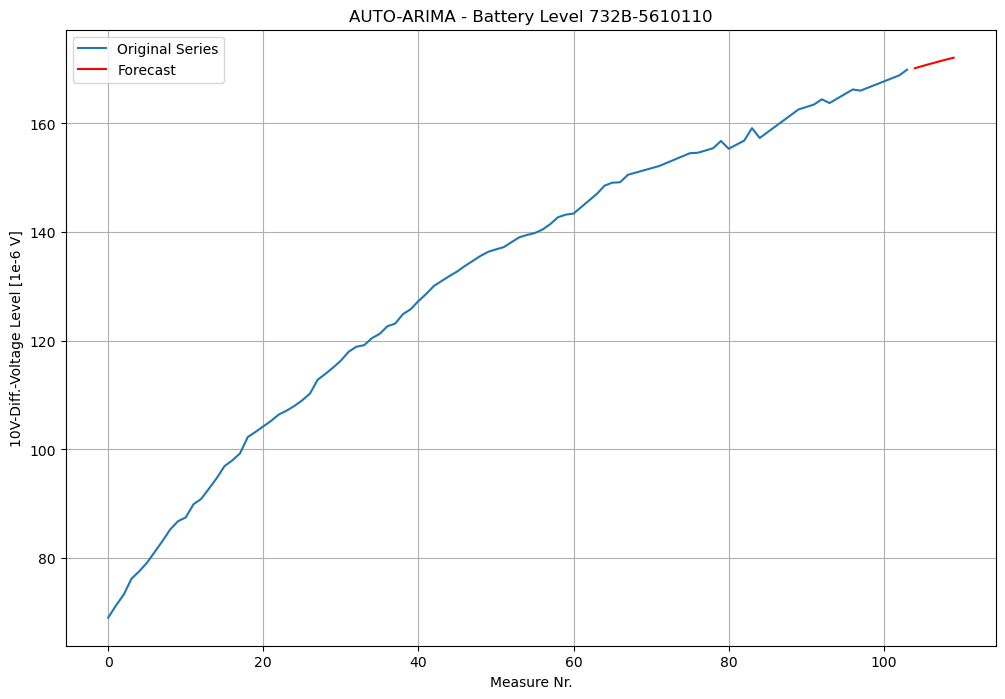

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from numpy import loadtxt

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


# Step 1: Create synthetic time series data (non-stationary)
#np.random.seed(42)
#n_periods = 50
#trend = np.linspace(10, 50, n_periods)  # linear trend
#noise = np.random.normal(scale=5, size=n_periods)  # random noise
#data = trend + noise

#series = pd.Series(data)

# load the dataset
data = loadtxt('110data.txt', usecols=[1], delimiter=',')
series = pd.Series(data)

# Plot original data
#plt.figure(figsize=(10,4))
#plt.plot(series)
#plt.title('ARIMA Forecast - Battery Level 732B-5610110')
#plt.ylabel('10V-Diff.-Voltage Level [1e-6 V]')
#plt.xlabel('Measure Number')
#plt.grid()
#plt.show()

# Step 2: ADF Test on original data
adf_result = adfuller(series)
print("Original Series ADF Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] > 0.05:
    print("Result: NOT stationary (need differencing)\n")
else:
    print("Result: Stationary\n")

# Step 3: Use Auto ARIMA to automatically difference and select best model
print("Running Auto-ARIMA...")
auto_model = pm.auto_arima(series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Step 4: Summary of best model
print("\nBest ARIMA Model Found:")
print(auto_model.summary())

# Step 5: Forecast future values
n_forecast = 6  # predict next 6 steps
forecast = auto_model.predict(n_periods=n_forecast)
print(forecast)

# Step 6: Plot the original series + forecast
plt.figure(figsize=(12,8))
plt.plot(series, label='Original Series')
plt.plot(range(len(series), len(series)+n_forecast), forecast, label='Forecast', color='red')
plt.legend()
plt.title('AUTO-ARIMA - Battery Level 732B-5610110')
plt.ylabel('10V-Diff.-Voltage Level [1e-6 V]')
plt.xlabel('Measure Nr.')
plt.grid()
plt.show()
